In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('universal_bank/UniversalBank.csv')

In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

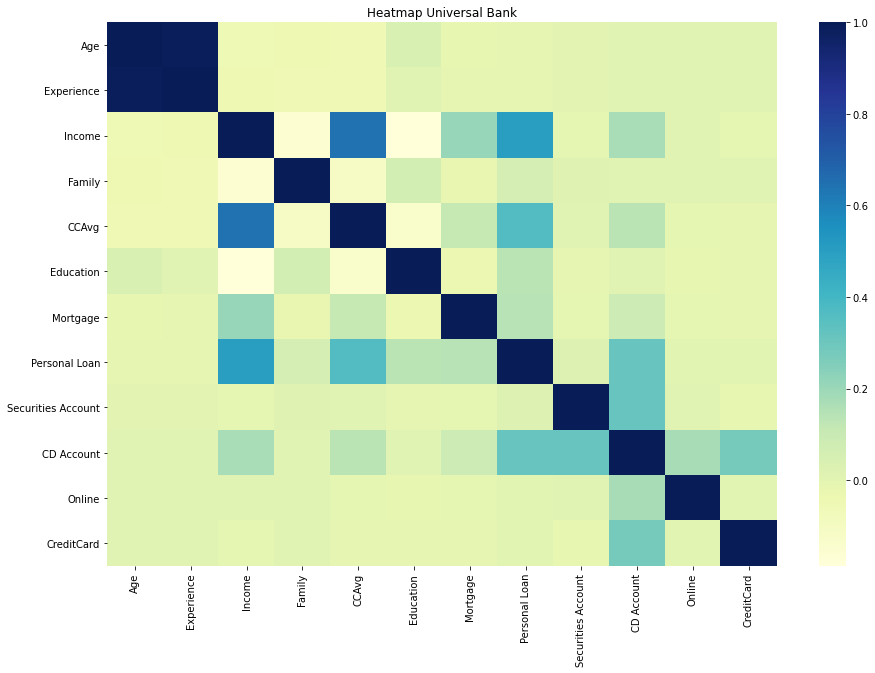

In [44]:
bank_corr = bank.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(bank_corr, cmap='YlGnBu')
plt.title('Heatmap Universal Bank')
plt.show()

In [17]:
bank = bank.drop(columns={'ID', 'ZIP Code'})

In [23]:
X = bank.drop(columns={'Personal Loan'})
Y = bank['Personal Loan']

In [30]:
print(f'X: {X.shape}')
print(f'Y: {Y.shape}')

X: (5000, 11)
Y: (5000,)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
print(f'X: {X_train.shape}')
print(f'X: {X_test.shape}')
print(f'Y: {Y_train.shape}')
print(f'Y: {Y_test.shape}')

X: (4000, 11)
X: (1000, 11)
Y: (4000,)
Y: (1000,)


In [120]:
classifier = svm.SVC(kernel='linear')

In [121]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [122]:
Y_pred = classifier.predict(X_test)

In [123]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[895,   7],
       [ 46,  52]], dtype=int64)

In [124]:
X.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [125]:
classifier.predict([[67, 43, 150, 10, 5, 2, 0, 1, 0, 1, 1]]) # income is the most effective for personal loan. 

array([1], dtype=int64)

In [126]:
acc = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
acc

0.947

C:\Users\Z-Service\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CCAvg', ylabel='Income'>

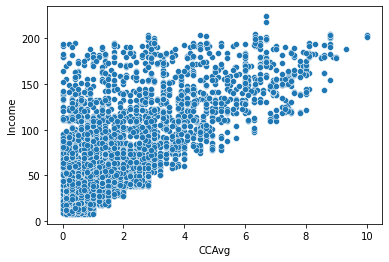

In [134]:
sns.scatterplot(bank['CCAvg'], bank['Income'])